In [1]:
from helper import *

2025-01-15 23:07:26.924939: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-15 23:07:30.137124: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736982451.340363    3941 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736982451.676811    3941 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-15 23:07:34.366931: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
data = pd.read_csv("data.csv")
print(data.shape)

(5572, 7480)


In [3]:
print(data.columns)

Index(['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence',
       'text_clean', 'y', '00', '000', '000pes',
       ...
       'ìï', 'ó_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò',
       'ûówell'],
      dtype='object', length=7480)


In [4]:
y = data["y"]
X = data.drop(columns=['class', 'text', 'No_of_Characters', 'No_of_Words', 'No_of_sentence', 'text_clean' ,'y'])
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SPLIT, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5572, 7473) (5572,)
(4457, 7473) (4457,)
(1115, 7473) (1115,)


In [5]:
def make_model(
                name,
                regularization,
                solver,
                C
            ):
    model = LogisticRegression(
        penalty=regularization,
        solver=solver,
        C=C,
        max_iter=1000,
        random_state=42,
        verbose=1
    )
    return model

param_grid = {
    'regularization' : ["l2"],
    'solver': ['lbfgs'],
    'C' : [10e-3,10e-2,10e-1,0.5,10e0,10e1,10e2,10e3,10e4,10e5,10e6,10e7]
}

def train_f(model:LogisticRegression,X_train,y):
    model = model.fit(X_train,y)
    history = []
    return model , history 

r = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 12


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model0
Parameters: {'regularization': 'l2', 'solver': 'lbfgs', 'C': 0.01, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model1
Parameters: {'regularization': 'l2', 'solver': 'lbfgs', 'C': 0.1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [149,   1]]), 'classification_report': {'0': {'precision': 0.8662477558348295, 'recall': 1.0, 'f1-sco

In [6]:
from pprint import pprint

r.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r])

[({'C': 100000.0, 'name': 'Model8', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 1000000.0, 'name': 'Model9', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 10000000.0,
   'name': 'Model10',
   'regularization': 'l2',
   'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 100000000.0,
   'name': 'Model11',
   'regularization': 'l2',
   'solver': 'lbfgs'},
  0.979372197309417),
 ({'C': 1000.0, 'name': 'Model6', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.97847533632287),
 ({'C': 10000.0, 'name': 'Model7', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.97847533632287),
 ({'C': 10.0, 'name': 'Model4', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9730941704035875),
 ({'C': 100.0, 'name': 'Model5', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9730941704035875),
 ({'C': 1.0, 'name': 'Model2', 'regularization': 'l2', 'solver': 'lbfgs'},
  0.9488789237668162),
 ({'C': 0.5, 'name': 'Model3', 'regularization': 'l2', 'solver': 'lbfg

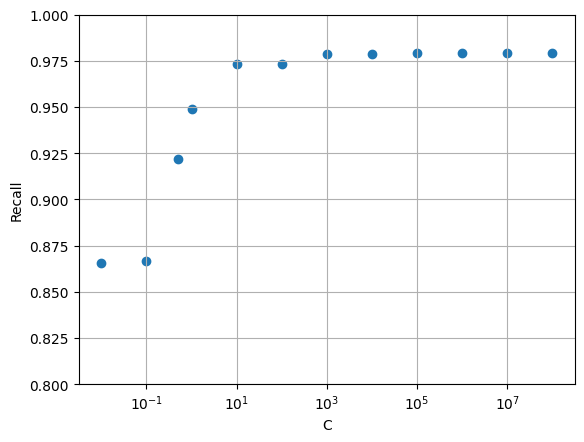

In [7]:
import matplotlib.pyplot as plt
points = [(param["C"], metrics["classification_report"]["accuracy"]) for _ , param , metrics in r]
plt.scatter(*zip(*points))
plt.xscale('log')
plt.xlabel('C')
plt.ylim([0.8,1])
plt.ylabel('Recall')
plt.grid()
plt.show()


In [8]:
from sklearn.ensemble import RandomForestClassifier

def make_model(
        name,
        max_depth,
        n_estimators,
        max_features,
    ):
    model = RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1,
    )
    return model

param_grid = {
    'max_depth' : [5,10,15],
    'n_estimators' : [10,20,30],
    'max_features' : [1,2,3]
}

r2 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 27
Model: Model0
Parameters: {'max_depth': 5, 'n_estimators': 10, 'max_features': 1, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model1
Parameters: {'max_depth': 10, 'n_estimators': 10, 'max_features': 1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'rec

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model2
Parameters: {'max_depth': 15, 'n_estimators': 10, 'max_features': 1, 'name': 'Model2'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model3
Parameters: {'max_depth': 5, 'n_estimators': 20, 'max_features': 1, 'name': 'Model3'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model5
Parameters: {'max_depth': 15, 'n_estimators': 20, 'max_features': 1, 'name': 'Model5'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model6
Parameters: {'max_depth': 5, 'n_estimators': 30, 'max_features': 1, 'name': 'Model6'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model8
Parameters: {'max_depth': 15, 'n_estimators': 30, 'max_features': 1, 'name': 'Model8'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model9
Parameters: {'max_depth': 5, 'n_estimators': 10, 'max_features': 2, 'name': 'Model9'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model11
Parameters: {'max_depth': 15, 'n_estimators': 10, 'max_features': 2, 'name': 'Model11'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model12
Parameters: {'max_depth': 5, 'n_estimators': 20, 'max_features': 2, 'name': 'Model12'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0,

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model14
Parameters: {'max_depth': 15, 'n_estimators': 20, 'max_features': 2, 'name': 'Model14'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model15
Parameters: {'max_depth': 5, 'n_estimators': 30, 'max_features': 2, 'name': 'Model15'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0,

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model17
Parameters: {'max_depth': 15, 'n_estimators': 30, 'max_features': 2, 'name': 'Model17'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model18
Parameters: {'max_depth': 5, 'n_estimators': 10, 'max_features': 3, 'name': 'Model18'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0,

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model20
Parameters: {'max_depth': 15, 'n_estimators': 10, 'max_features': 3, 'name': 'Model20'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model21
Parameters: {'max_depth': 5, 'n_estimators': 20, 'max_features': 3, 'name': 'Model21'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0,

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model23
Parameters: {'max_depth': 15, 'n_estimators': 20, 'max_features': 3, 'name': 'Model23'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model24
Parameters: {'max_depth': 5, 'n_estimators': 30, 'max_features': 3, 'name': 'Model24'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0,

/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [9]:
from pprint import pprint

r2.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r2])

[({'max_depth': 5, 'max_features': 1, 'n_estimators': 10, 'name': 'Model0'},
  0.8654708520179372),
 ({'max_depth': 10, 'max_features': 1, 'n_estimators': 10, 'name': 'Model1'},
  0.8654708520179372),
 ({'max_depth': 15, 'max_features': 1, 'n_estimators': 10, 'name': 'Model2'},
  0.8654708520179372),
 ({'max_depth': 5, 'max_features': 1, 'n_estimators': 20, 'name': 'Model3'},
  0.8654708520179372),
 ({'max_depth': 10, 'max_features': 1, 'n_estimators': 20, 'name': 'Model4'},
  0.8654708520179372),
 ({'max_depth': 15, 'max_features': 1, 'n_estimators': 20, 'name': 'Model5'},
  0.8654708520179372),
 ({'max_depth': 5, 'max_features': 1, 'n_estimators': 30, 'name': 'Model6'},
  0.8654708520179372),
 ({'max_depth': 10, 'max_features': 1, 'n_estimators': 30, 'name': 'Model7'},
  0.8654708520179372),
 ({'max_depth': 15, 'max_features': 1, 'n_estimators': 30, 'name': 'Model8'},
  0.8654708520179372),
 ({'max_depth': 5, 'max_features': 2, 'n_estimators': 10, 'name': 'Model9'},
  0.8654708520179

In [10]:
from sklearn.ensemble import AdaBoostClassifier

def make_model(
        name,
        n_estimators,
    ):
    model = AdaBoostClassifier(
        n_estimators=10
    )
    return model

param_grid = {
    'n_estimators' : [10,20,30,50,100],
}

r3 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 5
Model: Model0
Parameters: {'n_estimators': 10, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[964,   1],
       [122,  28]]), 'classification_report': {'0': {'precision': 0.8876611418047882, 'recall': 0.9989637305699481, 'f1-score': 0.9400292540224281, 'support': 965.0}, '1': {'precision': 0.9655172413793104, 'recall': 0.18666666666666668, 'f1-score': 0.3128491620111732, 'support': 150.0}, 'accuracy': 0.8896860986547085, 'macro avg': {'precision': 0.9265891915920492, 'recall': 0.5928151986183074, 'f1-score': 0.6264392080168006, 'support': 1115.0}, 'weighted avg': {'precision': 0.8981350565457553, 'recall': 0.8896860986547085, 'f1-score': 0.8556552506128422, 'support': 1115.0}}, 'roc_auc': np.float64(0.5928151986183074), 'fpr': array([0.        , 0.00103627, 1.        ]), 'tpr': array([0.        , 0.18666667, 1.        ]), 'history': []}
Model: Model1
Parameters: {'n_estimators': 20, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[964,   1],
       [122,  2

In [11]:
from pprint import pprint

r3.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r3])

[({'n_estimators': 10, 'name': 'Model0'}, 0.8896860986547085),
 ({'n_estimators': 20, 'name': 'Model1'}, 0.8896860986547085),
 ({'n_estimators': 30, 'name': 'Model2'}, 0.8896860986547085),
 ({'n_estimators': 50, 'name': 'Model3'}, 0.8896860986547085),
 ({'n_estimators': 100, 'name': 'Model4'}, 0.8896860986547085)]


In [ ]:
from sklearn.tree import DecisionTreeClassifier

def make_model(
        name,
        max_depth,
    ):
    model = DecisionTreeClassifier(
        max_depth=max_depth
    )
    return model

param_grid = {
    'max_depth' : [10,20,30,50],
}

r4 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 4
Model: Model0
Parameters: {'max_depth': 10, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[962,   3],
       [ 43, 107]]), 'classification_report': {'0': {'precision': 0.9572139303482587, 'recall': 0.9968911917098445, 'f1-score': 0.9766497461928934, 'support': 965.0}, '1': {'precision': 0.9727272727272728, 'recall': 0.7133333333333334, 'f1-score': 0.823076923076923, 'support': 150.0}, 'accuracy': 0.9587443946188341, 'macro avg': {'precision': 0.9649706015377657, 'recall': 0.855112262521589, 'f1-score': 0.8998633346349082, 'support': 1115.0}, 'weighted avg': {'precision': 0.9593009270808616, 'recall': 0.9587443946188341, 'f1-score': 0.9559897251459019, 'support': 1115.0}}, 'roc_auc': np.float64(0.855112262521589), 'fpr': array([0.        , 0.00310881, 1.        ]), 'tpr': array([0.        , 0.71333333, 1.        ]), 'history': []}
Model: Model1
Parameters: {'max_depth': 20, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[961,   4],
       [ 24, 126]]), 'cla

In [13]:
from pprint import pprint

r4.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r4])

[({'max_depth': 20, 'name': 'Model1'}, 0.9748878923766816),
 ({'max_depth': 50, 'name': 'Model3'}, 0.9713004484304932),
 ({'max_depth': 30, 'name': 'Model2'}, 0.9695067264573991),
 ({'max_depth': 10, 'name': 'Model0'}, 0.9587443946188341)]


In [14]:
from sklearn.svm import SVC

def make_model(
        name,
        C,
        gamma
    ):
    model = SVC(
        C=C,
        gamma=gamma
    )
    return model

param_grid = {
    'C' : [0.1,0.5,1,10,100],
    'gamma' : [3]
}

r5 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 5


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Model: Model0
Parameters: {'C': 0.1, 'gamma': 3, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}
Model: Model1
Parameters: {'C': 0.5, 'gamma': 3, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [128,  22]]), 'classification_report': {'0': {'precision': 0.8828911253430924, 'recall': 1.0, 'f1-score': 0.9378036929057337, 'support': 965.0}, '1': {'precision': 

In [15]:
from pprint import pprint

r5.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r5])

[({'C': 10, 'gamma': 3, 'name': 'Model3'}, 0.9309417040358744),
 ({'C': 100, 'gamma': 3, 'name': 'Model4'}, 0.9309417040358744),
 ({'C': 1, 'gamma': 3, 'name': 'Model2'}, 0.9273542600896861),
 ({'C': 0.5, 'gamma': 3, 'name': 'Model1'}, 0.885201793721973),
 ({'C': 0.1, 'gamma': 3, 'name': 'Model0'}, 0.8654708520179372)]


In [16]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
def make_model(
        name,
        reg_param,
    ):
    model = QuadraticDiscriminantAnalysis(
        reg_param=reg_param
    )
    return model

param_grid = {
    'reg_param' : [0,0.1,0.5,1],
}

r6 = grid_search(param_grid, make_model, X_train, y_train , X_test , y_test, train_f )

Grid size: 4


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Model: Model0
Parameters: {'reg_param': 0, 'name': 'Model0'}
Metrics: {'confusion_matrix': array([[472, 493],
       [  1, 149]]), 'classification_report': {'0': {'precision': 0.9978858350951374, 'recall': 0.48911917098445595, 'f1-score': 0.6564673157162726, 'support': 965.0}, '1': {'precision': 0.23208722741433022, 'recall': 0.9933333333333333, 'f1-score': 0.37626262626262624, 'support': 150.0}, 'accuracy': 0.5569506726457399, 'macro avg': {'precision': 0.6149865312547338, 'recall': 0.7412262521588946, 'f1-score': 0.5163649709894494, 'support': 1115.0}, 'weighted avg': {'precision': 0.8948636008779884, 'recall': 0.5569506726457399, 'f1-score': 0.6187716175834951, 'support': 1115.0}}, 'roc_auc': np.float64(0.7412262521588946), 'fpr': array([0.        , 0.51088083, 1.        ]), 'tpr': array([0.        , 0.99333333, 1.        ]), 'history': []}


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_cl

Model: Model1
Parameters: {'reg_param': 0.1, 'name': 'Model1'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_cl

Model: Model2
Parameters: {'reg_param': 0.5, 'name': 'Model2'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


Model: Model3
Parameters: {'reg_param': 1, 'name': 'Model3'}
Metrics: {'confusion_matrix': array([[965,   0],
       [150,   0]]), 'classification_report': {'0': {'precision': 0.8654708520179372, 'recall': 1.0, 'f1-score': 0.9278846153846154, 'support': 965.0}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 150.0}, 'accuracy': 0.8654708520179372, 'macro avg': {'precision': 0.4327354260089686, 'recall': 0.5, 'f1-score': 0.4639423076923077, 'support': 1115.0}, 'weighted avg': {'precision': 0.7490397956926541, 'recall': 0.8654708520179372, 'f1-score': 0.8030570886512591, 'support': 1115.0}}, 'roc_auc': np.float64(0.5), 'fpr': array([0., 1.]), 'tpr': array([0., 1.]), 'history': []}


/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/c/Users/kkiko/Desktop/TAA/FAA_P2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [17]:
from pprint import pprint

r6.sort(key=lambda x: x[2]["classification_report"]["accuracy"], reverse=True)
pprint([ (params , metrics["classification_report"]["accuracy"]) for model, params, metrics in r6])

[({'name': 'Model1', 'reg_param': 0.1}, 0.8654708520179372),
 ({'name': 'Model2', 'reg_param': 0.5}, 0.8654708520179372),
 ({'name': 'Model3', 'reg_param': 1}, 0.8654708520179372),
 ({'name': 'Model0', 'reg_param': 0}, 0.5569506726457399)]


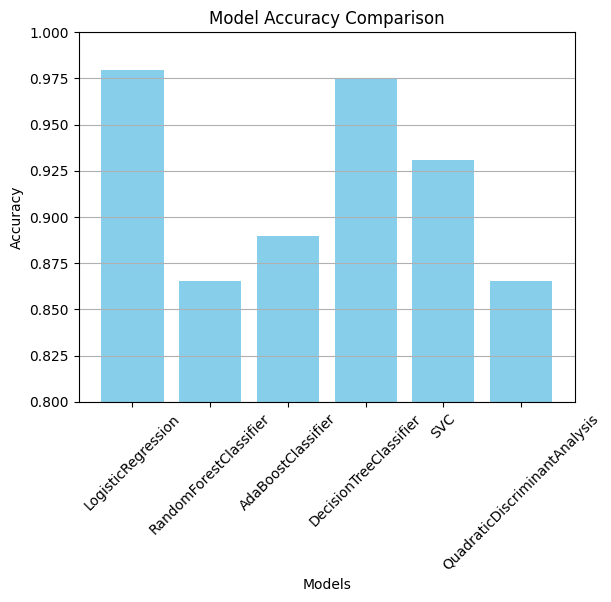

In [18]:
best_models = [
    r[0],
    r2[0],
    r3[0],
    r4[0],
    r5[0],
    r6[0],
]

import matplotlib.pyplot as plt

# Example data
models = [ str(type(m).__name__) for m , _ , _ in best_models]
accuracies = [ m["classification_report"]["accuracy"] for _ , _ , m in best_models]

plt.bar(models,accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim([0.8, 1])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

